<a href="https://colab.research.google.com/github/Diyon335/PRA3500/blob/master/Week2/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from scipy.stats import poisson
import math
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Errors and Probability

Generate a Poisson distribution which describes the alerts which arrive at a
Power Station during a typical evening. The power station receives 62 alerts over the course of 4 hours. The power station immediately shuts down if it receives 9 alerts in 15 minutes. What is the probability that this will happen?

In [2]:
def getPoissonPMF(x,mu):
  return poisson.pmf(k=x,mu=mu)

def getPoissonDist(mu):
  return np.arange(poisson.ppf(0.01,mu),poisson.ppf(0.99,mu))

def getErrorScale(events):
  return 1/math.sqrt(events)

In [3]:
#62 alerts every 4 hours => 3.875 every 15 mins. mu= 3.875
#And since we want P(9;2)
print("The probability that the station will shut down is: {} +/- {}".format(getPoissonPMF(9,3.875), getErrorScale(len(getPoissonDist(3.875)))))

The probability that the station will shut down is: 0.011266556820893085 +/- 0.3333333333333333


For this test, you need to know the critical z-value for your chosen Confidence Interval. Here are some common ones:


*   90% CI -> Z= 1.65
*   95% CI -> Z= 1.96
*   99% CI -> Z= 2.58

Now to calculate the average number of alerts based on a desired error rate and CI, we'll use the fact that:

*   Z = (Xobs - mu) / (error/sqrt(N))



In [4]:
def getXobs(criticalValue, mu, desiredError, N):
  return criticalValue*(desiredError/math.sqrt(N)) + mu

In [6]:
criticalValue = 1.96
desiredError = 0.33333
mu = 3.875
N = len(getPoissonDist(mu))

getXobs(criticalValue,mu,desiredError,N)

4.0927756

We would need approximately 4 alerts every 15 minutes to shut down the plant, with a 95% CI

#Covariance Matrix

In [8]:
#Cloned repo
from google.colab import drive
drive.mount("/content/gdrive")
%cd gdrive/My Drive/project_folder
!git clone https://github.com/dylan-profiler/heatmaps.git

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
[Errno 2] No such file or directory: 'gdrive/My Drive/project_folder'
/content
Cloning into 'heatmaps'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 51 (delta 9), reused 22 (delta 6), pack-reused 24
Unpacking objects: 100% (51/51), done.


In [9]:
#Got the information I thought was relevant to go on a Covariant Matrix (just integers)
#I only took 7 elements to compare, but more could be added by indicating their column name below
import pandas as pd
data = pd.read_csv("/content/heatmaps/autos.clean.csv")
dataFrame = pd.DataFrame(data,columns=["normalized-losses","wheel-base","length","width","height","curb-weight","engine-size"])
print(dataFrame)

     normalized-losses  wheel-base  length  ...  height  curb-weight  engine-size
0                  122        88.6   168.8  ...    48.8         2548          130
1                  122        88.6   168.8  ...    48.8         2548          130
2                  122        94.5   171.2  ...    52.4         2823          152
3                  164        99.8   176.6  ...    54.3         2337          109
4                  164        99.4   176.6  ...    54.3         2824          136
..                 ...         ...     ...  ...     ...          ...          ...
196                 95       109.1   188.8  ...    55.5         2952          141
197                 95       109.1   188.8  ...    55.5         3049          141
198                 95       109.1   188.8  ...    55.5         3012          173
199                 95       109.1   188.8  ...    55.5         3217          145
200                 95       109.1   188.8  ...    55.5         3062          141

[201 rows x 7 c

In [15]:
#And here is the Covariant matrix
pandasCovMatrix = pd.DataFrame.cov(dataFrame)
print(pandasCovMatrix)

                   normalized-losses   wheel-base  ...    curb-weight   engine-size
normalized-losses          1023.7600   -10.998000  ...    1645.295000    149.365000
wheel-base                  -10.9980    36.800791  ...    2454.308000    144.172627
length                        7.6580    65.483503  ...    5613.551833    350.696624
width                         5.8365    10.383567  ...     941.633333     63.686632
height                      -29.2715     8.772150  ...     389.474333      7.596333
curb-weight                1645.2950  2454.308000  ...  267595.903333  18248.283333
engine-size                 149.3650   144.172627  ...   18248.283333   1726.139453

[7 rows x 7 columns]


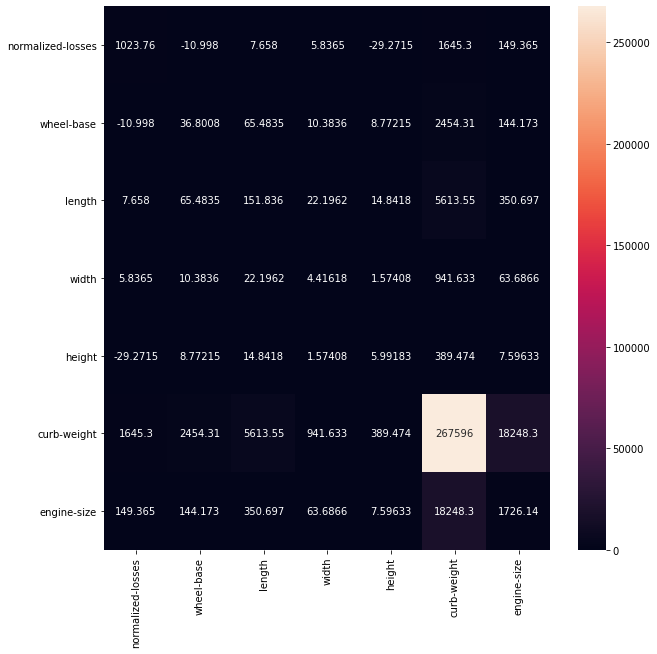

In [19]:
#Here I display this covariant matrix
plt.figure(figsize=(10,10))
sn.heatmap(pandasCovMatrix, annot=True, fmt='g')
plt.show()

In [27]:
#Looking at the elements on the top right and bottom left
print(pandasCovMatrix.iat[0,6])
print(pandasCovMatrix.iat[6,0])
print("")
print(pandasCovMatrix.iat[0,5])
print(pandasCovMatrix.iat[5,0])
print("")
print(pandasCovMatrix.iat[0,4])
print(pandasCovMatrix.iat[4,0])

149.36499999999998
149.36499999999998

1645.2950000000012
1645.2950000000012

-29.27149999999999
-29.27149999999999


They are the same, meaning this matrix is symmetrical

#Errors on straight line fitting

In [31]:
#These methods compute the errors for intercept and gradient respectively, and also the error matrix
def errorIntercept(x1,x2,dy1,dy2):
  return math.sqrt((dy2**2 + dy1**2)/(x2-x1)**2)

def errorGradient(x1,x2,dy1,dy2):
  return math.sqrt(((x2**2)*(dy1**2) + (x1**2)*(dy2**2))/(x2-x1)**2)

def getErrorMatrix(x1,x2,dy1,dy2):
  E = np.zeros(shape=(2,2))
  constant = 1/((x2-x1)**2)

  E[0,0]= constant*(dy2**2 + dy1**2)
  E[0,1]= constant*(-(x2**2)*(dy1**2)-(x1**2)*(dy2**2))
  E[1,0]= constant*(-(x2**2)*(dy1**2)-(x1**2)*(dy2**2))
  E[1,1]= constant*((x2**2)*(dy1**2) + (x1**2)*(dy2**2))

  print(E)

Let's take two arbitrary points:
*   (200,400) +/- 2
*   (400,700) +/- 40

In [32]:
x1=200
dy1=2
x2=400
dy2=40

print(errorGradient(x1,x2,dy1,dy2))
print(errorIntercept(x1,x2,dy1,dy2))
getErrorMatrix(x1,x2,dy1,dy2)

40.19950248448356
0.20024984394500786
[[ 4.010e-02 -1.616e+03]
 [-1.616e+03  1.616e+03]]


#Errors with weighted measurements

In [60]:
#Computes the weighted Mean with its weighted error
def computeWeightedMeanError(array):
  x = []
  errors = []
  total = 0
  weightedError = 0

  for i in range(len(array)):
    element = array[i]
    x.append(element[0])
    errors.append(element[1])

  for j in range(len(errors)):
    weightedError += 1/(errors[j]**2)

  for a in range(len(x)):
    total += x[a]/(errors[a]**2)

  weightedMean = total/weightedError

  print("{} +/- {}".format(weightedMean,weightedError))
  


In [62]:
a = [[1,2] , [3,4] , [6,10] , [16,5]]
computeWeightedMeanError(a)

3.1379310344827585 +/- 0.3625
